# Avacado Project


# Problem Statement:


# Content


# Columns in the dataset:


# Importing the required libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import zscore
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# Renaming & Calling the dataframe


In [3]:
df=pd.read_csv('C:\\Users\\admin\\Downloads\\avocado.csv')
df 


,Serial no,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Renaming the columns with numeric names


In [4]:
df= df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass", "4770" : "XLarge Hass"})
df=df.drop('Serial no',axis=1)
df.head()


,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Extracting the dataset informations


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   Small Hass    18249 non-null  float64
 4   Large Hass    18249 non-null  float64
 5   XLarge Hass   18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


# Checking the data shape


In [6]:
df.shape


(18249, 13)

# Obtaining the column names inolved in our dataset.


In [7]:
df.columns


Index(['Date', 'AveragePrice', 'Total Volume', 'Small Hass', 'Large Hass',
       'XLarge Hass', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags',
       'type', 'year', 'region'],
      dtype='object')

# Checking the null values , if there's any


In [8]:
df.isnull().sum()


Date            0
AveragePrice    0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Checking the no of values per column


In [9]:
df.notnull().sum()


Date            18249
AveragePrice    18249
Total Volume    18249
Small Hass      18249
Large Hass      18249
XLarge Hass     18249
Total Bags      18249
Small Bags      18249
Large Bags      18249
XLarge Bags     18249
type            18249
year            18249
region          18249
dtype: int64

# Checking the null-values through visualisation heatmap


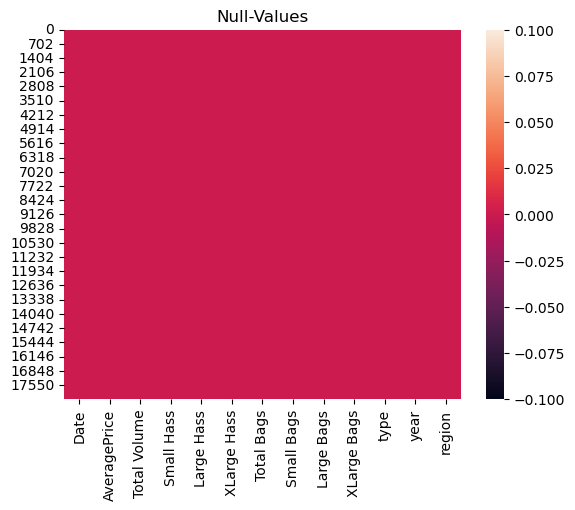

In [10]:
sns.heatmap(df.isnull())
plt.title('Null-Values')
plt.show()


# Checking duplicate values


In [11]:
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18249, dtype: bool

# Correcting date format


In [12]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()


,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


# Checking unique values in categorical data columns


In [13]:
df.type.unique()


array(['conventional', 'organic'], dtype=object)

In [14]:
df.year.unique()


array([2015, 2016, 2017, 2018], dtype=int64)

In [15]:
df.region.unique()


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [16]:
df.Month.unique()


array([12,  6, 11,  8,  1, 10,  4,  9,  2,  7,  5,  3], dtype=int64)

In [17]:
df['XLarge Bags'].unique()


array([  0.  ,  33.33, 104.17, ..., 228.27,  12.12,  24.18])

# Average price


In [18]:
print(df["AveragePrice"].mean())
print(df["AveragePrice"].min())
print(df["AveragePrice"].max())


1.405978409775878
0.44
3.25


In [19]:
df[df["AveragePrice"] > 3.0]


,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
13037,02-10-2016,3.03,3714.71,296.71,2699.80,0.00,718.20,718.20,0.00,0.0,organic,2016,LasVegas,2
14124,06-11-2016,3.12,19043.80,5898.49,10039.34,0.00,3105.97,3079.30,26.67,0.0,organic,2016,SanFrancisco,6
14125,30-10-2016,3.25,16700.94,2325.93,11142.85,0.00,3232.16,3232.16,0.00,0.0,organic,2016,SanFrancisco,10
16055,12-03-2017,3.05,2068.26,1043.83,77.36,0.00,947.07,926.67,20.40,0.0,organic,2017,MiamiFtLauderdale,12
16720,27-08-2017,3.04,12656.32,419.06,4851.90,145.09,7240.27,6960.97,279.30,0.0,organic,2017,RaleighGreensboro,8
17428,16-04-2017,3.17,3018.56,1255.55,82.31,0.00,1680.70,1542.22,138.48,0.0,organic,2017,Tampa,4


# Graphical Representation of the dataframe


In [20]:
df_visualization_nominal=df[['type','year','region','Month']].copy()
df_visualization_nominal


,type,year,region,Month
0,conventional,2015,Albany,12
1,conventional,2015,Albany,12
2,conventional,2015,Albany,12
3,conventional,2015,Albany,6
4,conventional,2015,Albany,11
...,...,...,...,...
18244,organic,2018,WestTexNewMexico,4
18245,organic,2018,WestTexNewMexico,1
18246,organic,2018,WestTexNewMexico,1
18247,organic,2018,WestTexNewMexico,1


conventional    9126
organic         9123
Name: type, dtype: int64


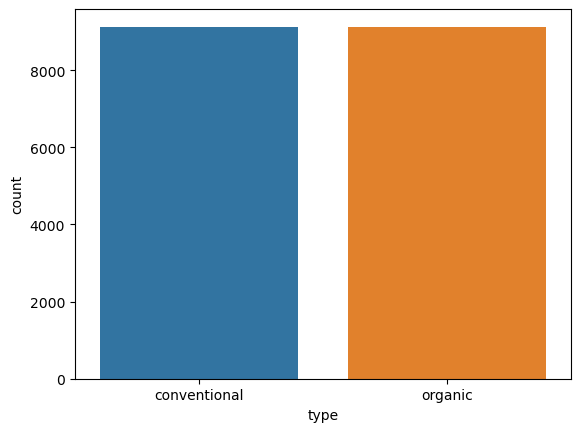

In [21]:
ax=sns.countplot(x='type',data=df_visualization_nominal)
print(df_visualization_nominal['type'].value_counts())


2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


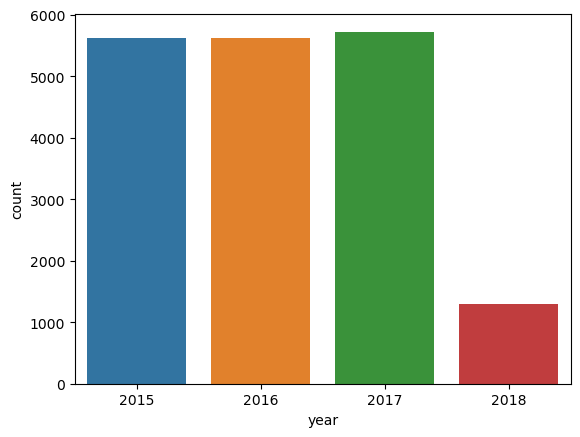

In [22]:
ax=sns.countplot(x='year',data=df_visualization_nominal)
print(df_visualization_nominal['year'].value_counts())


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

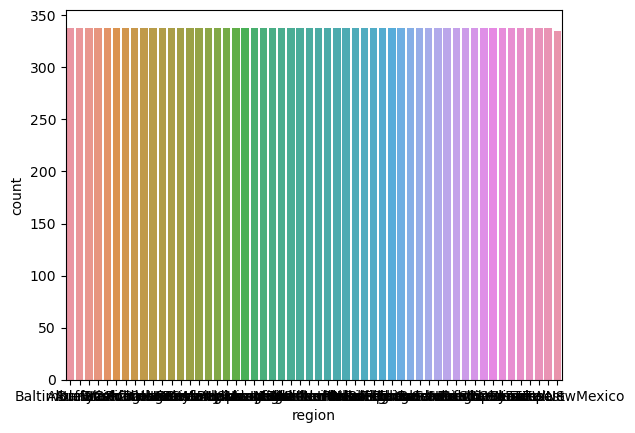

In [23]:
ax=sns.countplot(x='region',data=df_visualization_nominal)
print(df_visualization_nominal['region'].value_counts())


1     1836
3     1728
11    1620
8     1620
5     1620
12    1512
10    1512
4     1512
2     1404
7     1404
6     1293
9     1188
Name: Month, dtype: int64


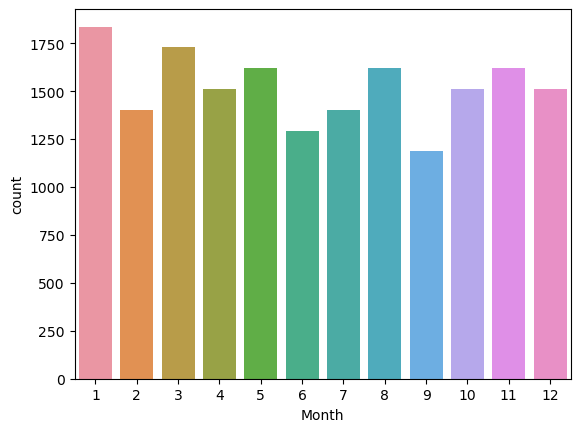

In [24]:
ax=sns.countplot(x='Month',data=df_visualization_nominal)
print(df_visualization_nominal['Month'].value_counts())


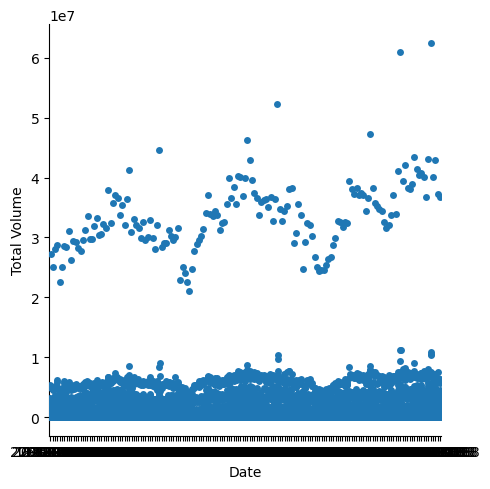

In [25]:
sns.catplot(x='Date',y='Total Volume',data=df)


In [26]:
df.drop(columns=["Date"],inplace=True)


# Dataframe for Visualisation for the continous data


In [27]:
df_visualisation_continous=df[['AveragePrice','Total Volume','Small Hass','Large Hass','XLarge Hass','Total Bags','Small Bags','Large Bags','XLarge Bags']].copy()
df_visualisation_continous


,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0
...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0


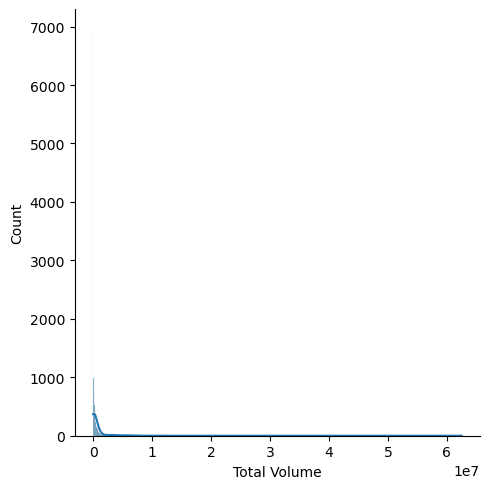

In [28]:
sns.displot(df_visualisation_continous['Total Volume'],kde=True)


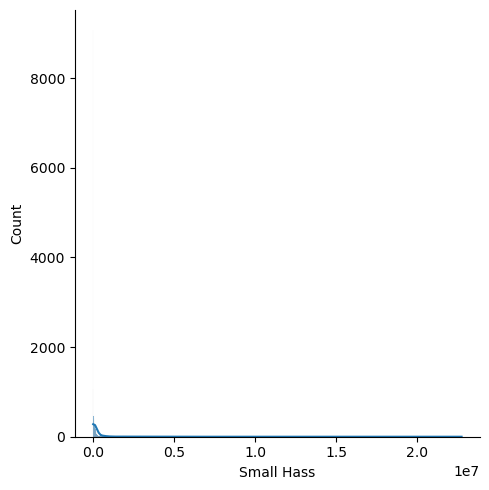

In [29]:
sns.displot(df_visualisation_continous['Small Hass'],kde=True) 


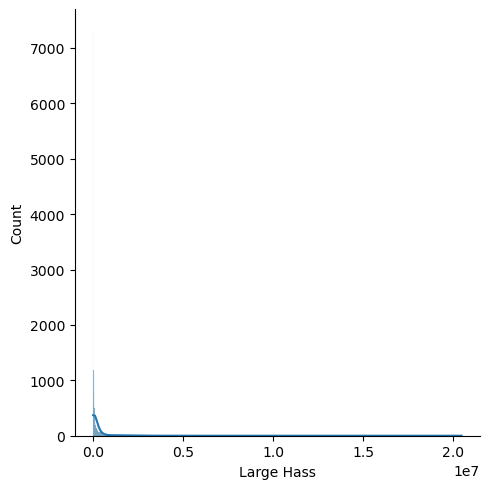

In [30]:
sns.displot(df_visualisation_continous['Large Hass'],kde=True)


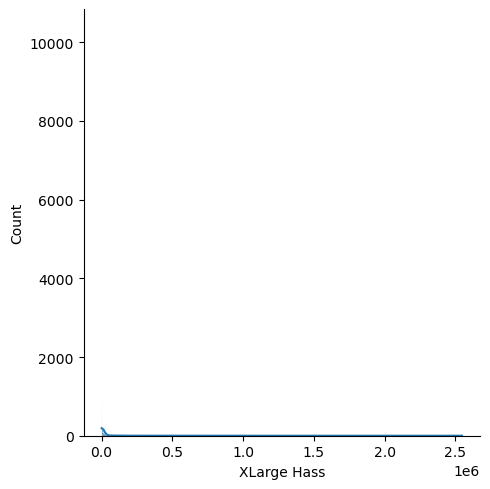

In [31]:
sns.displot(df_visualisation_continous['XLarge Hass'],kde=True)


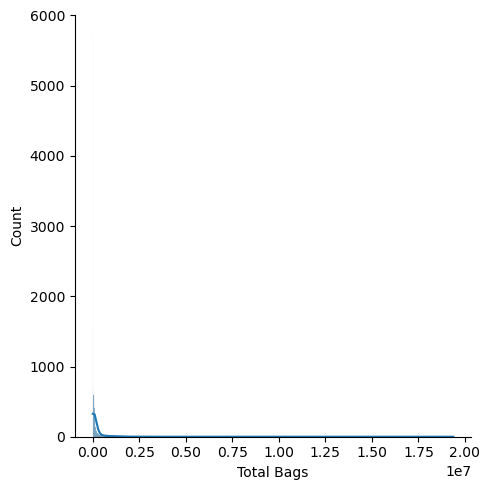

In [32]:
sns.displot(df_visualisation_continous['Total Bags'],kde=True)


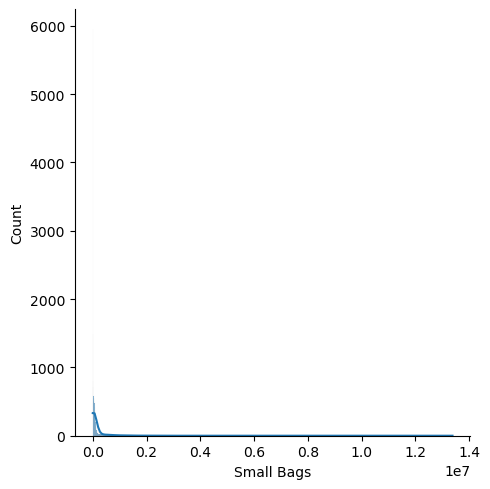

In [33]:
sns.displot(df_visualisation_continous['Small Bags'],kde=True)


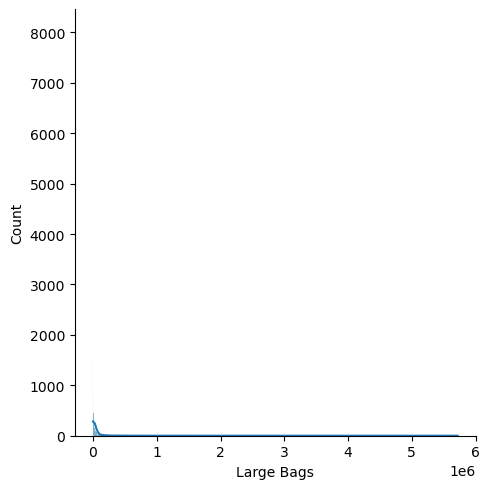

In [34]:
sns.displot(df_visualisation_continous['Large Bags'],kde=True)


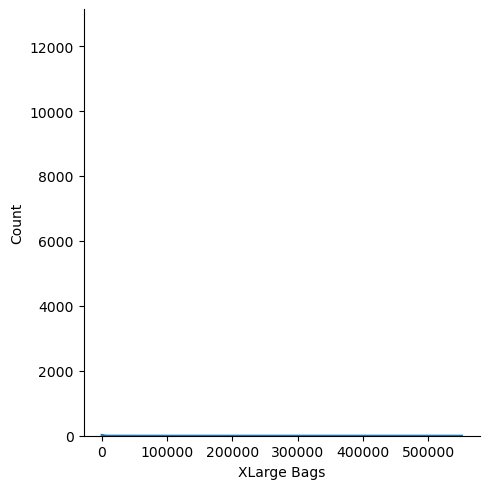

In [35]:
sns.displot(df_visualisation_continous['XLarge Bags'],kde=True)


# Graph for the Target Variable - 'Average Price'


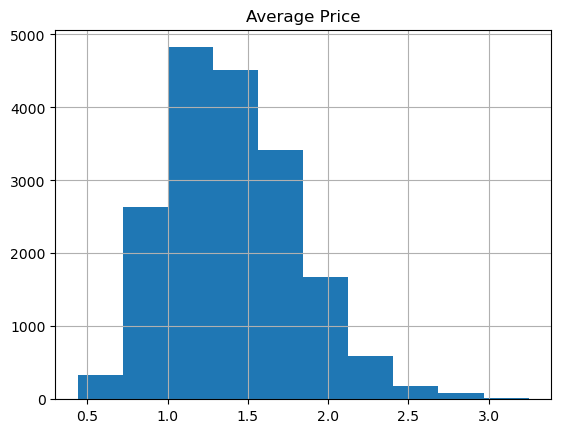

In [36]:
df['AveragePrice'].hist(grid=True) # analysis on single attribute of the dataset
plt.title('Average Price')
plt.show()


# Encoding the Dataframe :


In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


In [38]:
le=preprocessing.LabelEncoder()
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])
#df['Date']=le.fit_transform(df['Date'])
df


,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


# Description of the dataframe


In [39]:
df.describe()


,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644,6.372842
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788,3.525034
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000,3.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000,6.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000,10.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000,12.000000


# Graph for the description


<Axes: >

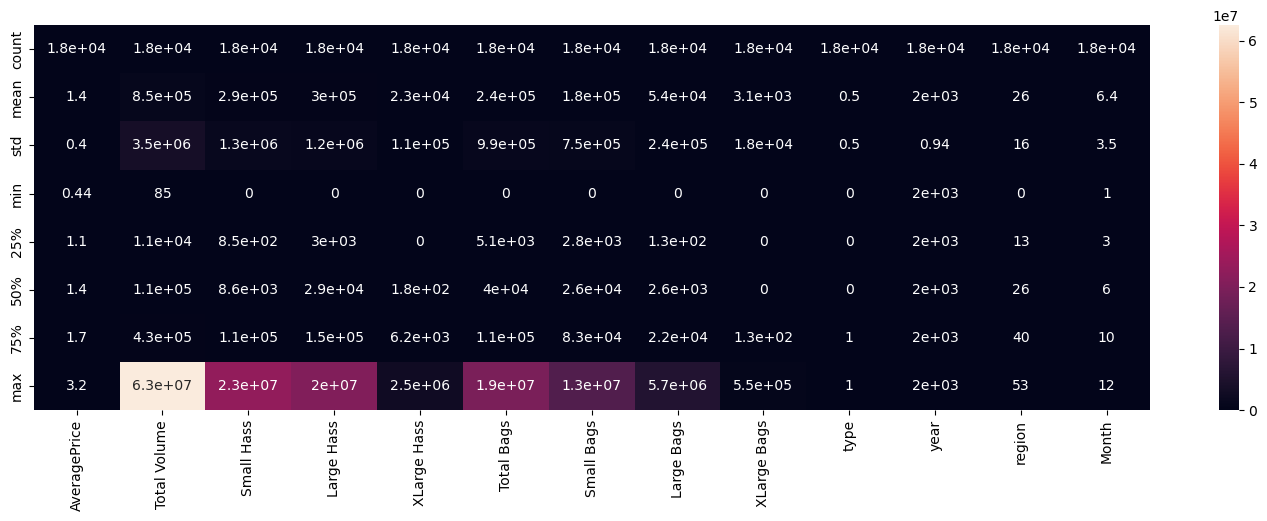

In [40]:
plt.figure(figsize=(18,5))
sns.heatmap(df.describe(),annot=True)


# Correlation of the columns with the target variables :-


In [41]:
df.corr()


,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.075134
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.015344
Small Hass,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.014522
Large Hass,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.015892
XLarge Hass,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.024220
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.013061
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.012432
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.014330
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.006182
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,0.000017


<Axes: >

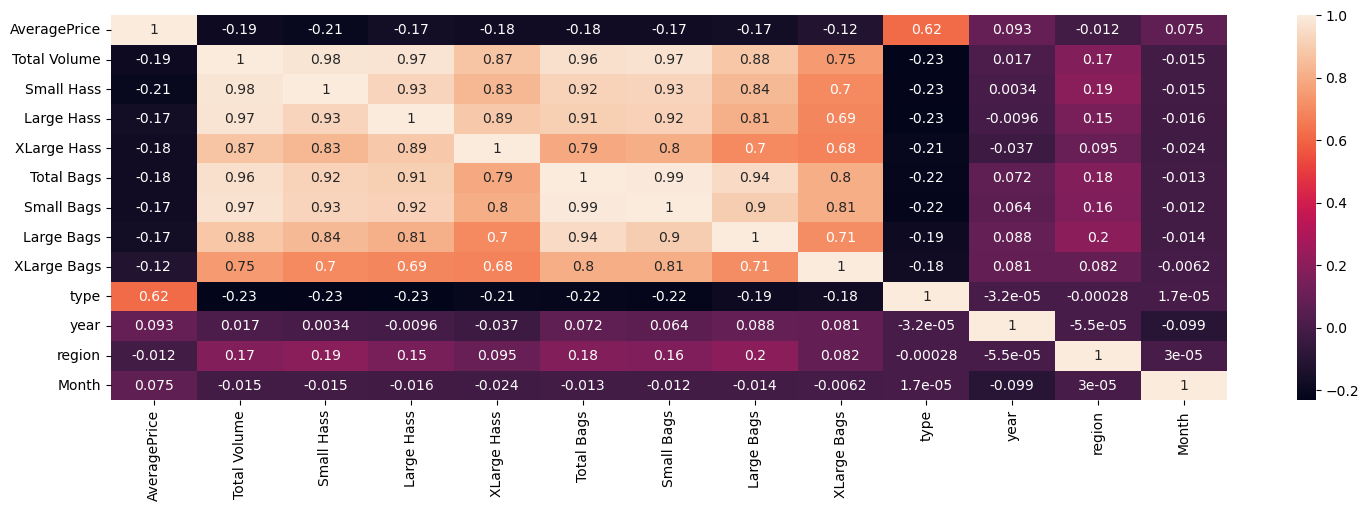

In [42]:
plt.figure(figsize=(18,5))
sns.heatmap(df.corr(),annot=True)


#  Checking the columns which are positivly or negatively related to target variable :-


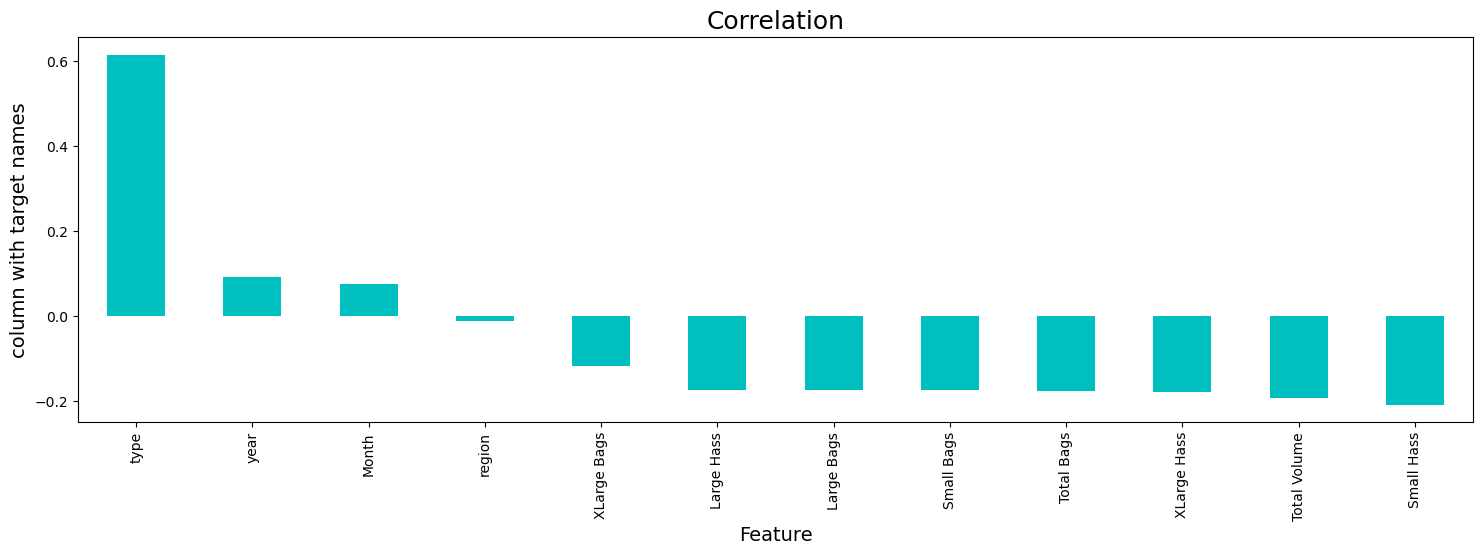

In [43]:
plt.figure(figsize=(18,5))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


# Checking the skewness of the data


In [44]:
df.skew()


AveragePrice     0.580303
Total Volume     9.007687
Small Hass       8.648220
Large Hass       8.942466
XLarge Hass     10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.047551
dtype: float64

In [45]:
x=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']


In [46]:
x.head()


,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11


In [47]:
x.shape


(18249, 12)

In [48]:
y.head()


0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [49]:
y.shape


(18249,)

# Handling the skewness


In [50]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)
df_new.skew()


Total Volume    0.011171
Small Hass     -0.022679
Large Hass     -0.017740
XLarge Hass     0.032184
Total Bags     -0.001626
Small Bags      0.007058
Large Bags     -0.073809
XLarge Bags     0.793520
type            0.000329
year            0.213156
region         -0.261443
Month          -0.160972
dtype: float64

In [51]:
df.dtypes


AveragePrice    float64
Total Volume    float64
Small Hass      float64
Large Hass      float64
XLarge Hass     float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object

# Box-plot graph for the variables :-


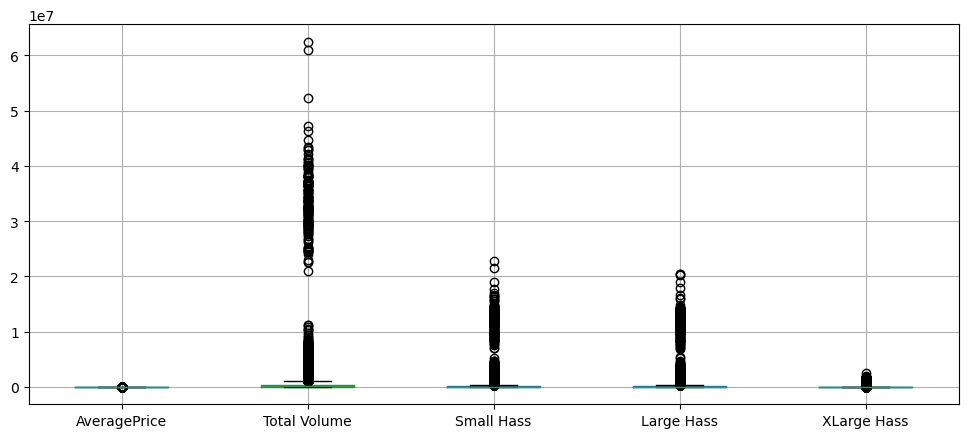

In [52]:
# plotting boxplots for first 5 columns
df.iloc[:,0:5].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


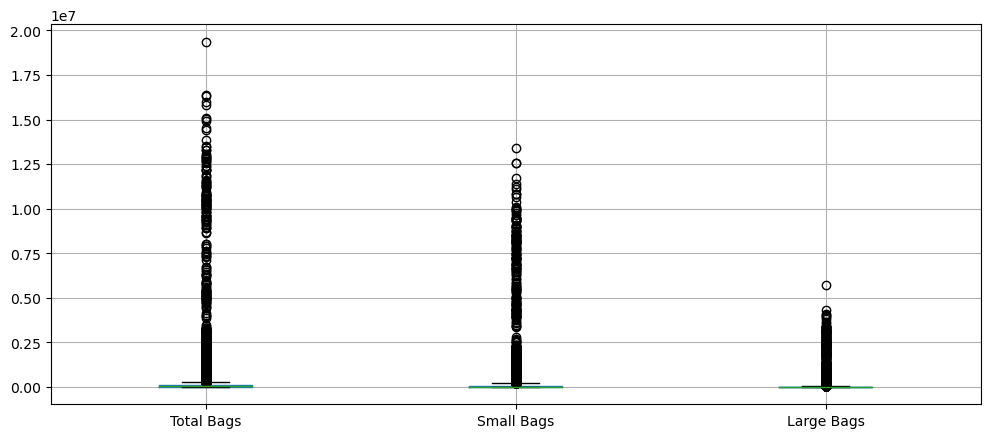

In [53]:
# plotting boxplots for first 5 columns
df.iloc[:,5:8].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()


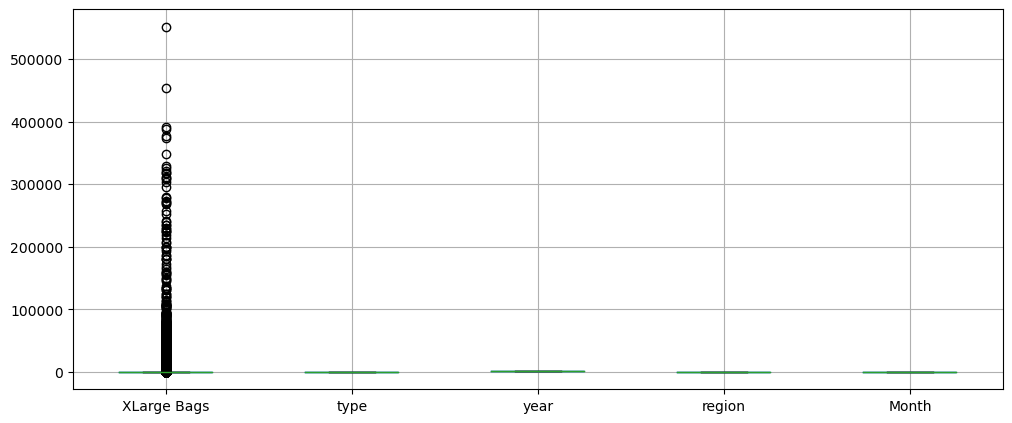

In [54]:
# plotting boxplots for first 5 columns
df.iloc[:,8:16].boxplot(figsize=[12,10])
plt.subplots_adjust(bottom=0.5)
plt.show()

In [55]:
df.shape


(18249, 13)

# Handling the outliers :-


In [56]:
from numpy import percentile

columns = df.columns
for j in columns:
    if isinstance(df[j][0], str) :
        continue
    else:
        for i in range(len(df)):
            #defining quartiles
            quartiles = percentile(df[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if df[j][i] > upper_fence:
                df[j][i] = upper_fence
            elif df[j][i] < lower_fence:
                df[j][i] = lower_fence


In [57]:
df # improved dataframe


,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1


# Scaling the data with Min-Max Scaler


In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
mms=MinMaxScaler()
lr=LinearRegression()


In [59]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is :{r2_score(y_test,pred_test)} ')
    print('\n')        


At random state 0,the training accuracy is:0.4202002913309013
At random state 0,the testing accuracy is :0.42129611971656566 


At random state 1,the training accuracy is:0.4181577615355314
At random state 1,the testing accuracy is :0.4291529386436951 


At random state 2,the training accuracy is:0.42330966263431846
At random state 2,the testing accuracy is :0.4109661617217698 


At random state 3,the training accuracy is:0.42026292385140174
At random state 3,the testing accuracy is :0.42172843766425305 


At random state 4,the training accuracy is:0.42425561642288223
At random state 4,the testing accuracy is :0.40746058113726236 


At random state 5,the training accuracy is:0.42021915088325934
At random state 5,the testing accuracy is :0.42104471033444546 


At random state 6,the training accuracy is:0.4184959396470579
At random state 6,the testing accuracy is :0.4281286824073004 


At random state 7,the training accuracy is:0.4214940609106419
At random state 7,the testing accuracy is

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=21)


In [61]:
lr.fit(x_train,y_train)


LinearRegression()

In [62]:
pred_test=lr.predict(x_test)


In [63]:
print(r2_score(y_test,pred_test))


0.4101210615685589


In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('error :')

print('Mean absolute error :',mean_absolute_error(y_test,pred_test))
print('Mean squared error :',mean_squared_error(y_test,pred_test))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred_test)))
print('r2_score value :',r2_score(y_test,pred_test))


error :
Mean absolute error : 0.23607222284028195
Mean squared error : 0.09245154451253315
Root Mean Squared Error :  0.30405845574910945
r2_score value : 0.4101210615685589


# Testing - Linear Regression with Lasso and Ridge models


In [65]:
from sklearn.linear_model import Lasso,Ridge


In [66]:
ls=Lasso(alpha=0.0001)
# ls=lasso(alpha=0.1) --> default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)


0.42343078028666026

In [67]:
Rg=Ridge(alpha=.001)
Rg.fit(x_train,y_train)
Rg.score(x_train,y_train)


0.4235124736044408

# Cross Validation Score for each model¶


In [71]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print('The cross validation score for the Linear Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.3000567641285938.')


The cross validation score for the Linear Regression model is : -7.162225706669611
The difference between accuracy and crossvalidation score is :0.3000567641285938.


In [72]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(ls,x,y,cv=5)
print('The cross validation score for the Lasso Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.3777567641285938.')


The cross validation score for the Lasso Regression model is : 0.04040451874960045
The difference between accuracy and crossvalidation score is :0.3777567641285938.


In [73]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(Rg,x,y,cv=5)
print('The cross validation score for the Ridge Regression model is :',scr.mean())
print('The difference between accuracy and crossvalidation score is :0.8830430523800308.')


The cross validation score for the Ridge Regression model is : -7.955648661809482
The difference between accuracy and crossvalidation score is :0.8830430523800308.


# Saving the best model


In [74]:
import pickle

filename='pickledtcfile.pkl'
pickle.dump(lr,open('pickledtcfile','wb'))


In [75]:
saved_model=pickle.load(open('pickledtcfile','rb'))
saved_model.predict(x_test)


array([1.60368004, 1.19295206, 1.16673748, ..., 1.14318724, 1.16019635,
       1.64450957])